## РК №1

### Рубежный контроль №1. Емельянова Т.И. Вариант №5: задание 1, датасет 5

### Задание:
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

Набор данных состоит из информации, необходимой для прогнозирования поступления в аспирантуру в Индии.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
%matplotlib inline 
sns.set(style="ticks")

In [2]:
dataset = pd.read_csv('dataset/Admission_Predict.csv')

In [3]:
print(dataset.shape[0], 'x', dataset.shape[1])

400 x 9


In [4]:
dataset.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Набор данных содержит несколько параметров, которые считаются важными при подаче заявки на магистерские программы.
Включены следующие параметры:

1. Баллы GRE (из 340)
2. Баллы TOEFL (из 120)
3. Рейтинг университета ( из 5 )
4. Заявление о целях и рекомендательное письмо (из 5)
5. Средний балл бакалавриата (из 10)
6. Исследовательский опыт (0 или 1)
7. Шанс допуска (от 0 до 1)

In [5]:
dataset.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
print('Число уникальных значений для каждого столбца')
dataset.nunique()

Число уникальных значений для каждого столбца


Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [7]:
print('Число пропусков')
dataset.isna().sum()

Число пропусков


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Визуализирование

Визуализация различных значений для каждого столбца:

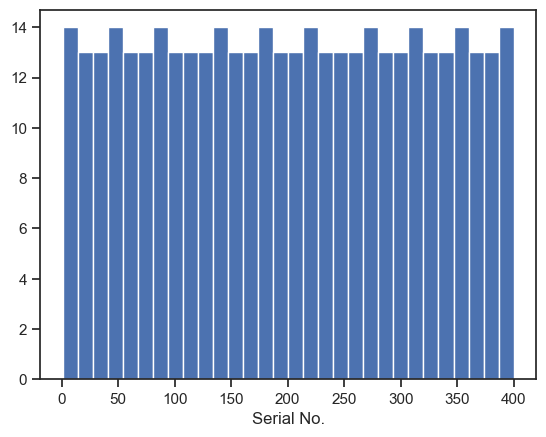

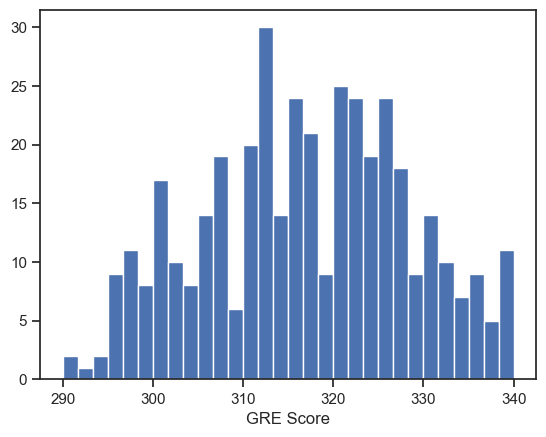

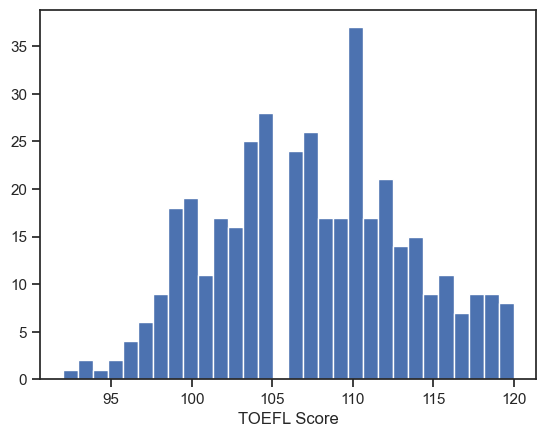

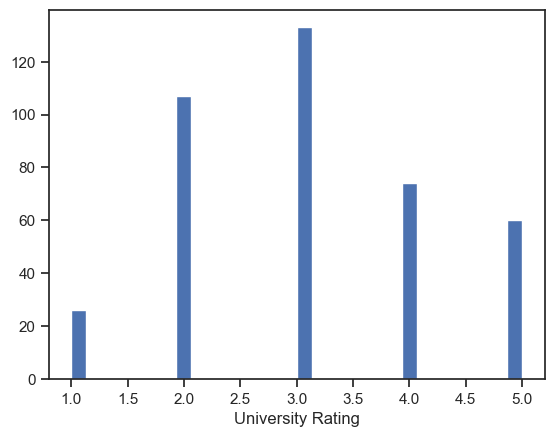

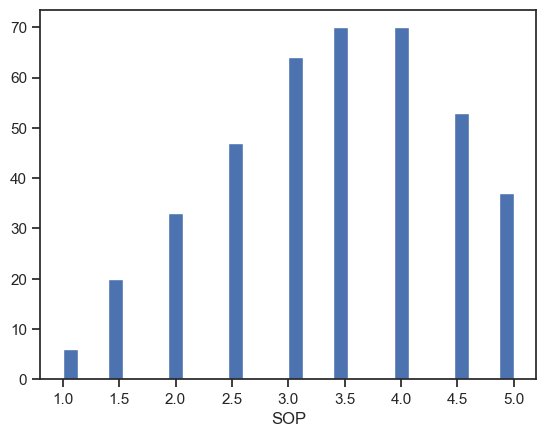

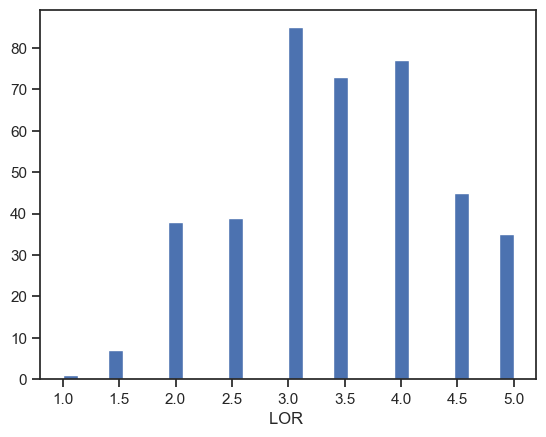

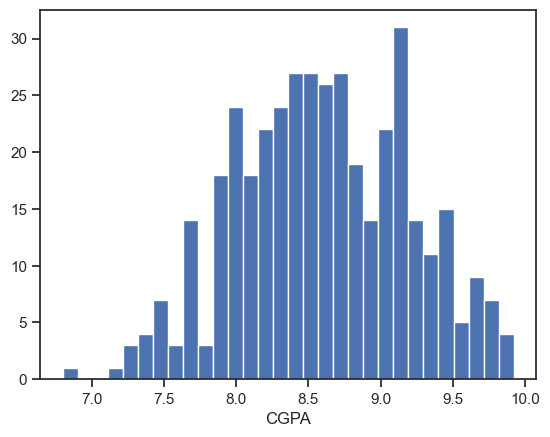

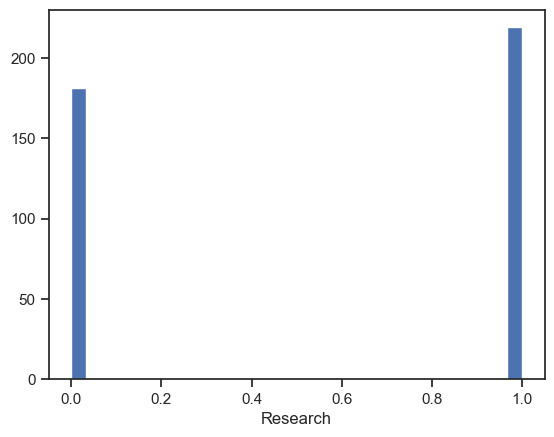

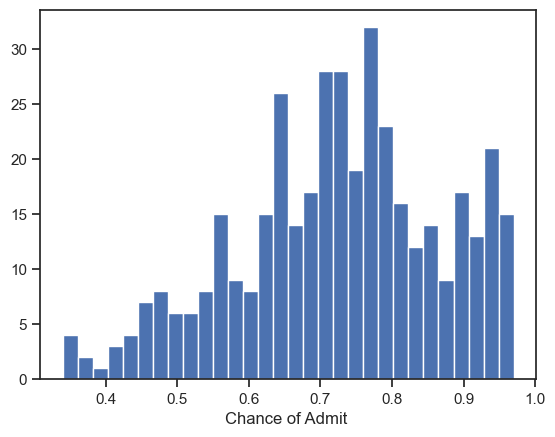

In [11]:
for column in dataset:
    plt.hist(dataset[column], 30)
    plt.xlabel(column)
    plt.show()

### Парные диаграммы

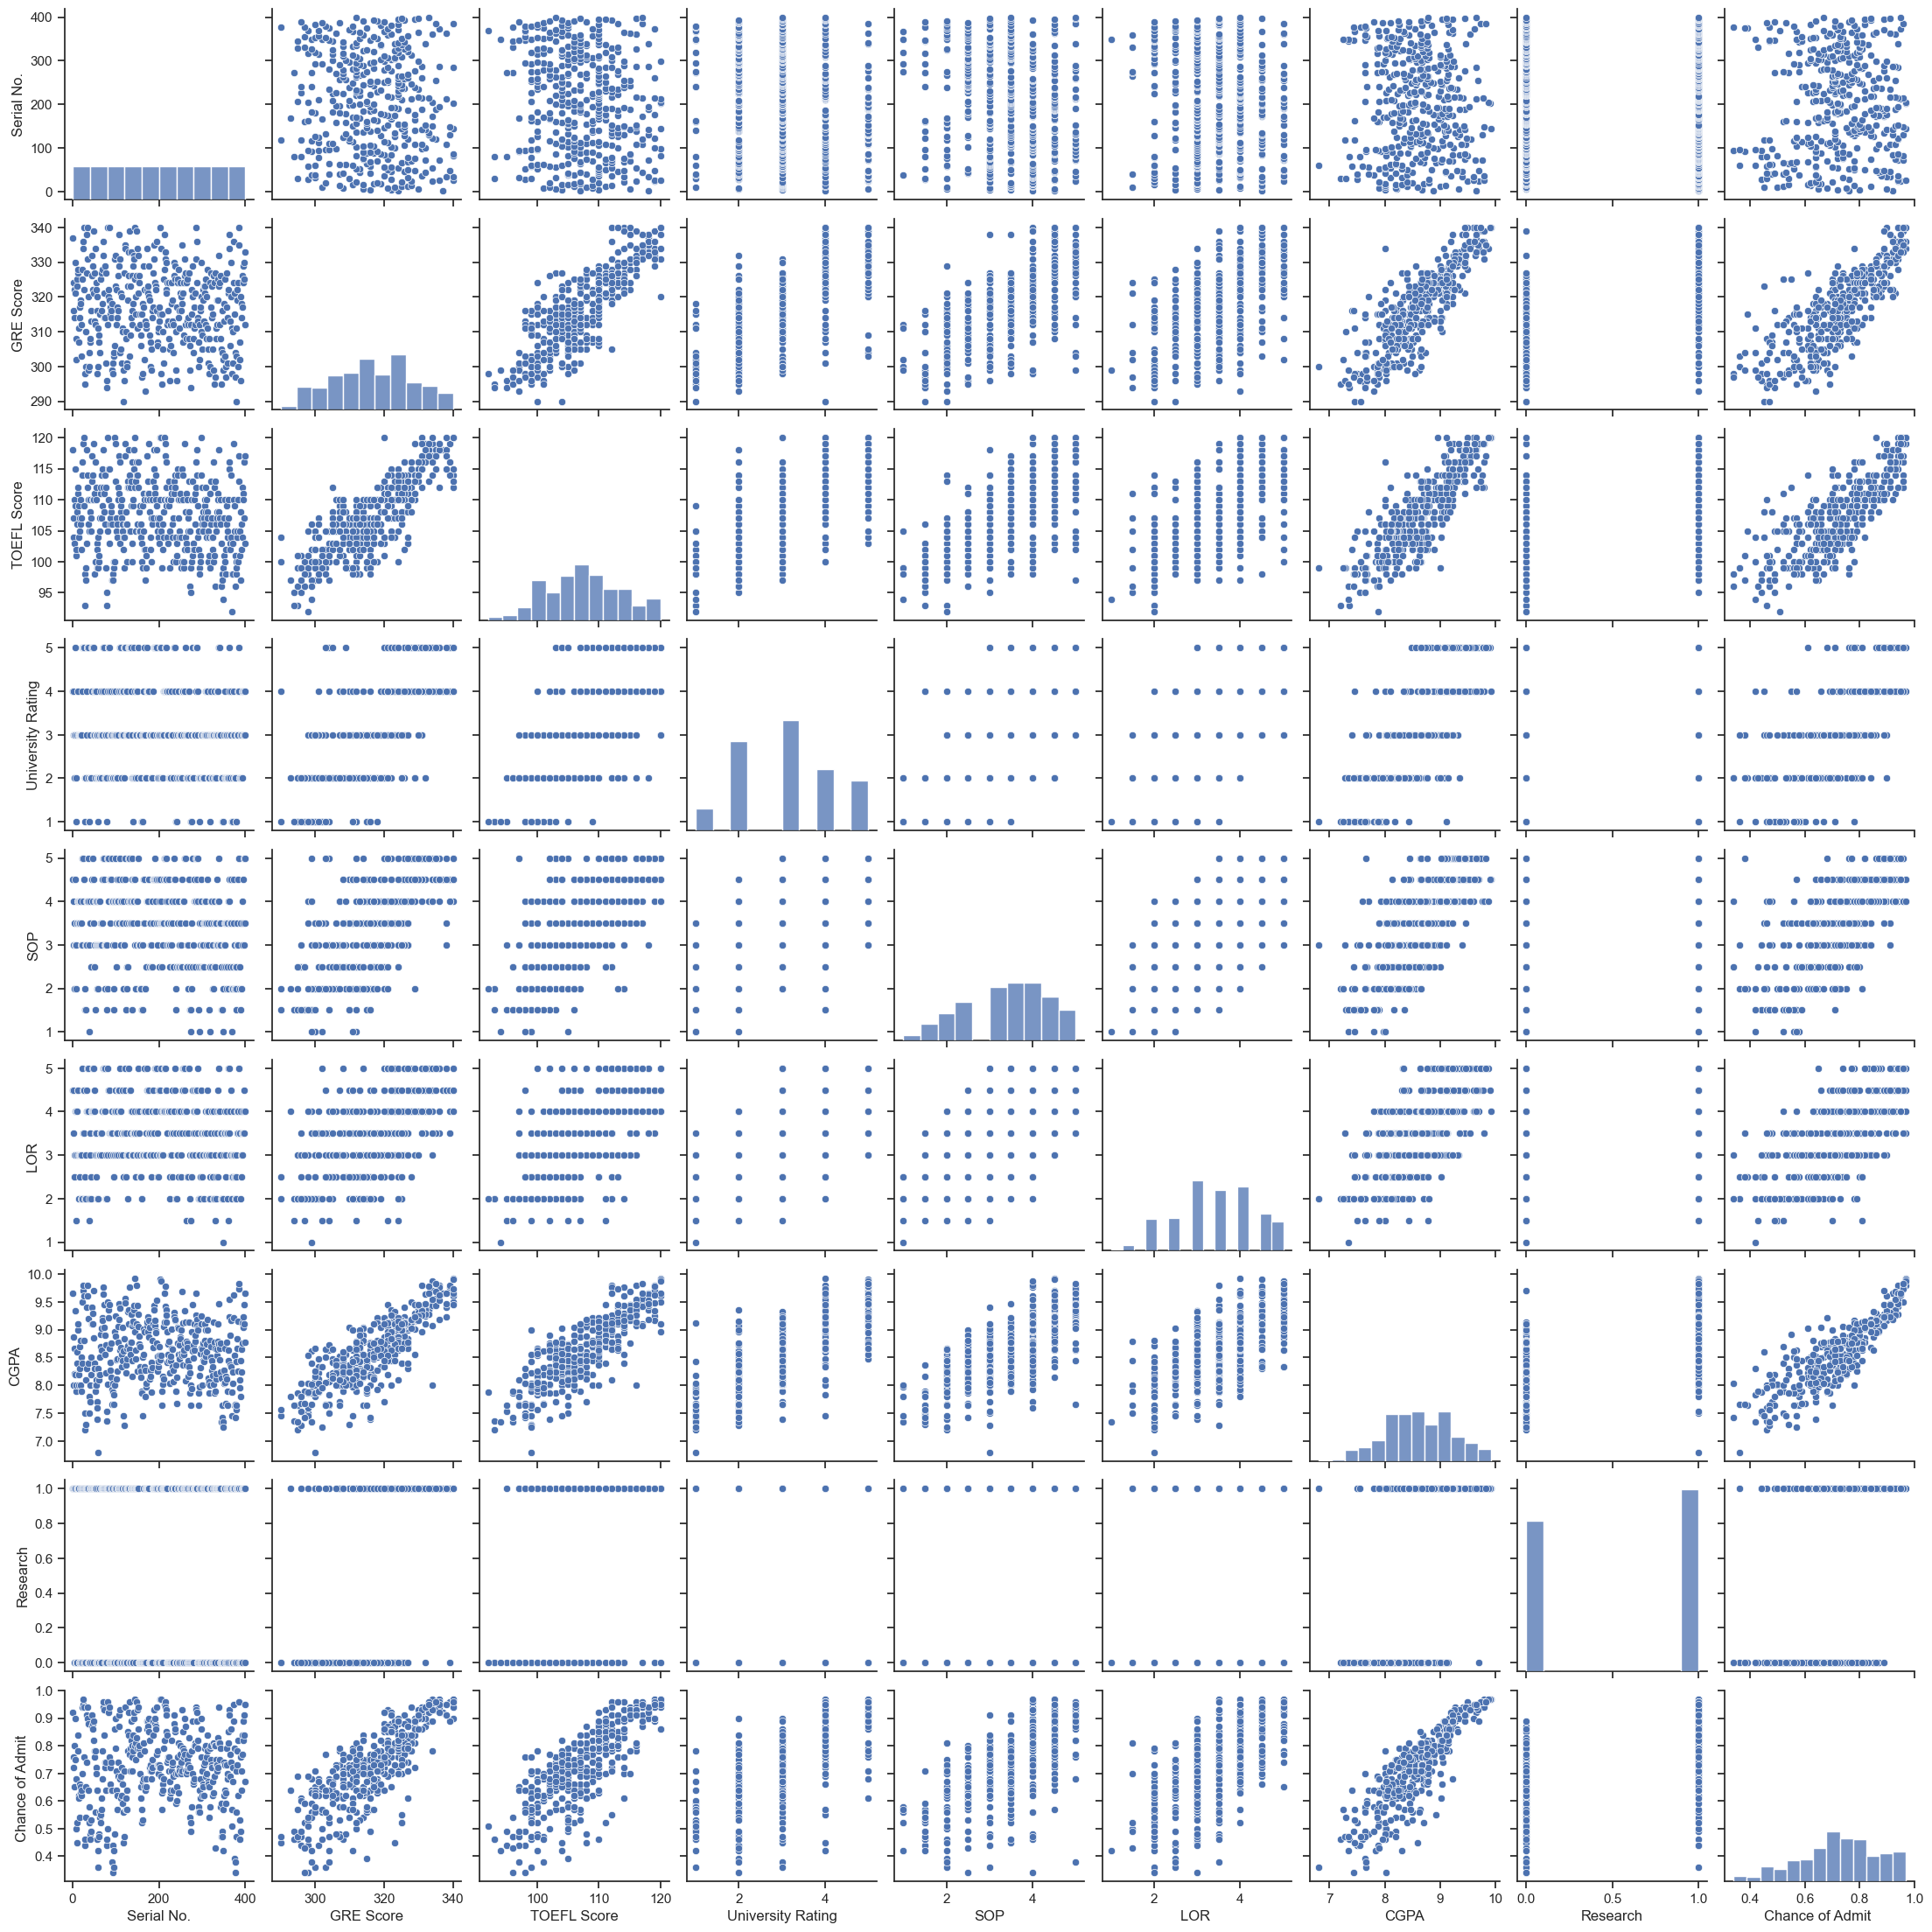

In [9]:
sns.pairplot(dataset)

### Тепловая карта

<Axes: >

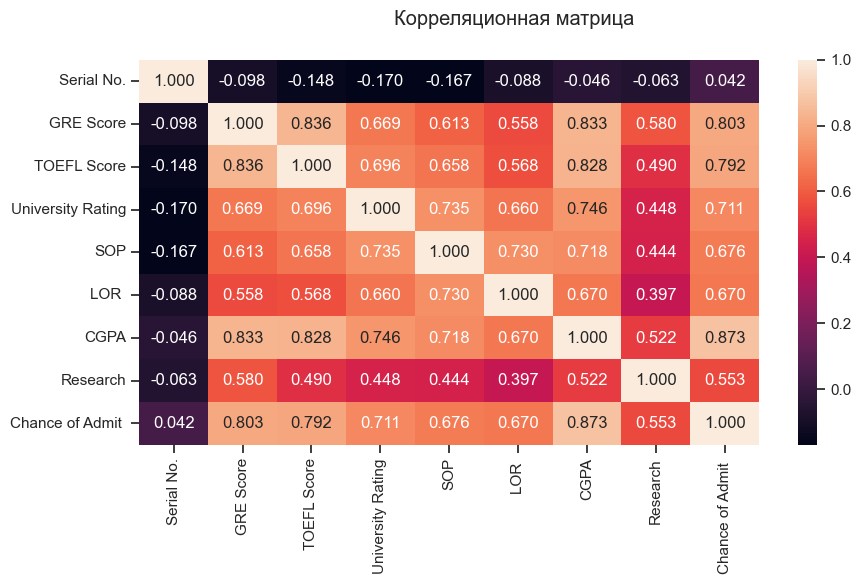

In [10]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(dataset.corr(), ax=ax, annot=True, fmt='.3f')

По тепловой карте видно, что такие признаки, как Баллы GRE и TOEFL, а также CGPA (средний бал бакалавриата) имеют сильную связь с шансом поступлнения. На основании этого можно сделать модель предсказания шанса поступления судя по этим параметрам.

Для этого можно использовать классифкацию (или регрессию) на основе метода k-ближайших соседей (также можно использовать SVM и дерево решений).